In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./train_folds.csv')
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,kfold
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,4
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,3
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,4


In [3]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
kfold           0
dtype: int64

In [4]:
features = df.columns

for feat in features:
    print(feat,':',df[feat].nunique(),df[feat].dtype)

id : 15730 int64
title : 4782 object
Rating : 34 float64
maincateg : 2 object
platform : 2 object
price1 : 1478 int64
actprice1 : 885 int64
Offer % : 2530 object
norating1 : 2770 float64
noreviews1 : 1122 float64
star_5f : 2196 float64
star_4f : 1448 float64
star_3f : 1107 float64
star_2f : 759 int64
star_1f : 1001 int64
fulfilled1 : 2 int64
kfold : 5 int64


<Axes: >

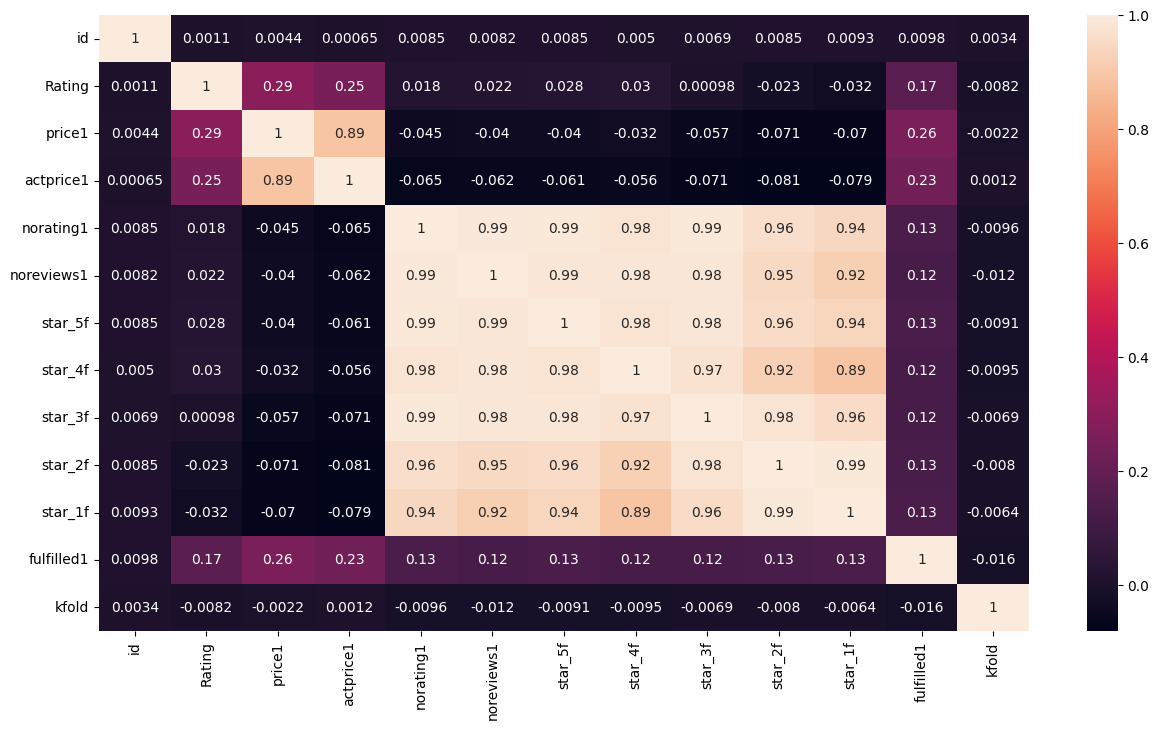

In [8]:
plt.figure(figsize=(15,8))
# updated_df = df.drop(['title', 'maincateg', 'platform', 'Offer %'], axis='columns')
# numeric_cols = updated_df.columns.tolist()
# for col in numeric_cols:
#     if updated_df[col].dtype == 'object':
#         updated_df[col] = pd.to_numeric(updated_df[col].str.rstrip('%'))
sns.heatmap(df.drop(['title', 'maincateg', 'platform', 'Offer %'], axis='columns').corr(), annot=True)

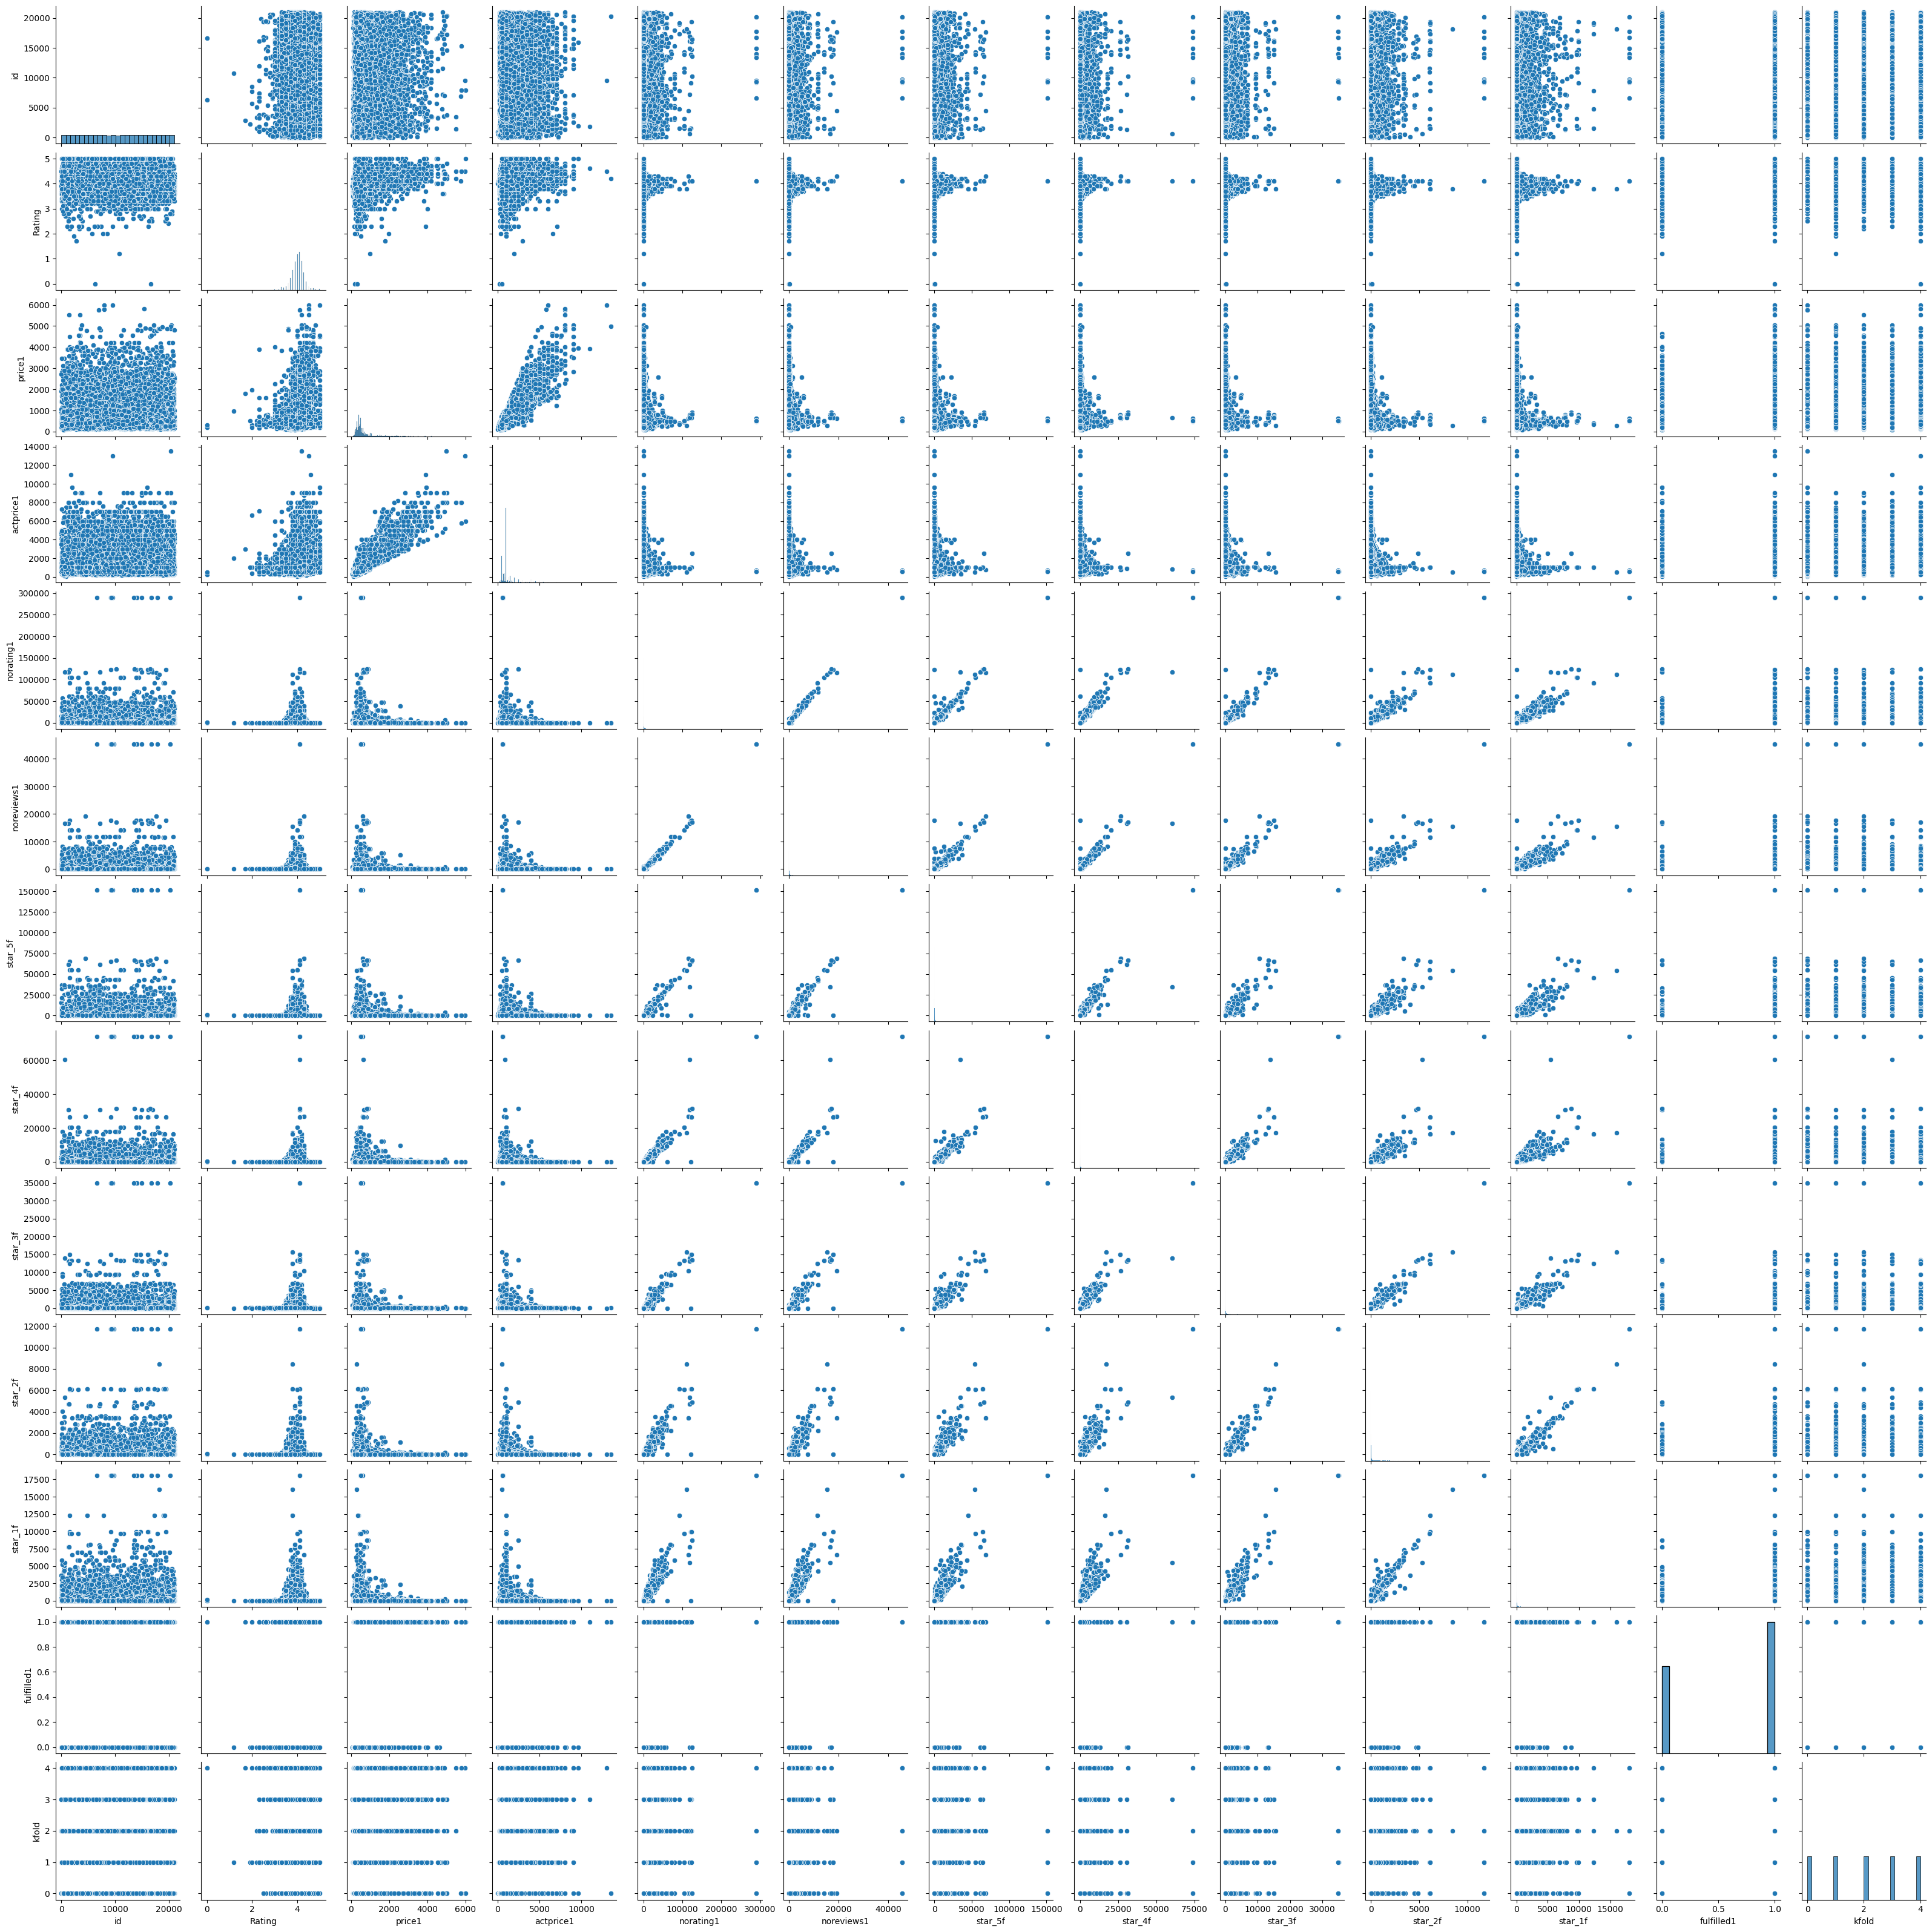

In [9]:
sns.pairplot(df)

from above plot we can observe that XGBRegressor can be the best suited model to impute star_f columns and linear regression is best suited model for imputing noreviews1 from norating1 since they are much linear,

and from the correlation matrix we can observe that all star_f columns is identical nature,

and star_f columns, norating1 and noreview1 are highly correlated data.

###  NULL VALUES

#### FEATURE 1 : MAIN CATEGORY

In [10]:
df.loc[df['title'].str.upper().str.contains('WOMEN') & df['maincateg'].isnull(), 'maincateg'] = 'Women'
df.loc[df['title'].str.upper().str.contains('MEN') & df['maincateg'].isnull(), 'maincateg'] = 'Men'
df['maincateg'].isnull().sum()

57

In [11]:
df[df['maincateg'].isnull()]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,kfold
91,4262,Slippers,3.6,NaN,Flipkart,213,249,14.46%,NaN,NaN,NaN,NaN,466.0,281,476,1,1
228,18304,Slippers,3.8,NaN,Flipkart,141,499,71.74%,NaN,23.0,71.0,NaN,22.0,14,17,0,2
728,6801,Slides,3.7,NaN,Flipkart,419,998,58.02%,NaN,4.0,NaN,NaN,NaN,3,4,1,4
842,19010,Slides,3.9,NaN,Flipkart,2110,2995,29.55%,NaN,1.0,NaN,NaN,0.0,1,1,1,2
1056,7202,Flip Flops,3.8,NaN,Flipkart,326,499,34.67%,NaN,NaN,NaN,21.0,NaN,2,10,0,0
1095,9788,Flip Flops,4.2,NaN,Flipkart,1047,1799,41.80%,NaN,7.0,NaN,NaN,5.0,3,2,1,2
1283,20792,Slippers,4.4,NaN,Flipkart,599,1199,50.04%,NaN,17.0,NaN,NaN,NaN,3,2,1,3
1288,11000,Slippers,4.3,NaN,Flipkart,599,1199,50.04%,NaN,NaN,NaN,NaN,NaN,3,5,1,1
1646,12858,Flip Flops,3.4,NaN,Flipkart,498,1497,66.73%,NaN,7.0,NaN,NaN,8.0,8,23,1,4
2029,2784,Flip Flops,3.6,NaN,Flipkart,99,499,80.16%,NaN,14.0,NaN,NaN,NaN,6,8,0,1


In [12]:
df.loc[df['maincateg'].isnull(), 'maincateg'] = 'Unisex'
print(df['maincateg'].isnull().sum())


0


#### FEATURE 2 : STAR_F COLUMNS

In [13]:
XGB_S5 = XGBRegressor()
X_S5 = np.array(df.loc[df['star_5f'].notna(), ['Rating', 'star_2f', 'star_1f']])
y_S5 = np.array(df[df['star_5f'].notna()]['star_5f'])
XGB_S5.fit(X_S5, y_S5)

df.loc[df['star_5f'].isnull(), 'star_5f'] = XGB_S5.predict(np.array(df.loc[df['star_5f'].isnull(), ['Rating', 'star_2f', 'star_1f']]))

In [14]:
XGB_S4 = XGBRegressor()
X_S4 = np.array(df.loc[df['star_4f'].notna(), ['Rating', 'star_2f', 'star_1f']])
y_S4 = np.array(df[df['star_4f'].notna()]['star_4f'])
XGB_S4.fit(X_S4, y_S4)

df.loc[df['star_4f'].isnull(), 'star_4f'] = XGB_S4.predict(np.array(df.loc[df['star_4f'].isnull(), ['Rating', 'star_2f', 'star_1f']]))

In [15]:
XGB_S3 = XGBRegressor()
X_S3 = np.array(df.loc[df['star_3f'].notna(), ['Rating', 'star_2f', 'star_1f']])
y_S3 = np.array(df[df['star_3f'].notna()]['star_3f'])
XGB_S3.fit(X_S3, y_S3)

df.loc[df['star_3f'].isnull(), 'star_3f'] = XGB_S3.predict(np.array(df.loc[df['star_3f'].isnull(), ['Rating', 'star_2f', 'star_1f']]))

#### FEATURE 3 : "NO RATING"

In [16]:
df.loc[df['norating1'].isnull(), 'norating1'] = df.loc[df['norating1'].isnull(), 'star_5f'] + df.loc[df['norating1'].isnull(), 'star_4f'] + df.loc[df['norating1'].isnull(), 'star_3f'] + df.loc[df['norating1'].isnull(), 'star_2f'] + df.loc[df['norating1'].isnull(), 'star_1f']

#### FEATURE 4 :  "NO REVIEWS "

<Axes: xlabel='norating1', ylabel='noreviews1'>

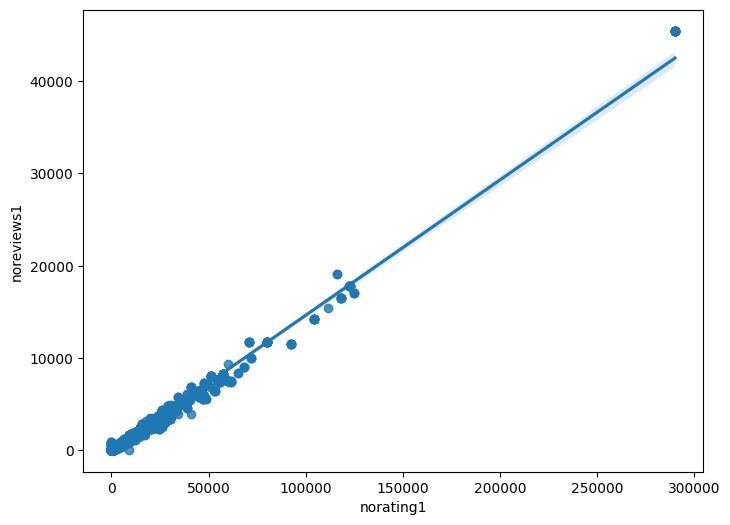

In [17]:
#LOOKIGN INTO RELATION BETWEEN "NO RATING" AND "NO REVIEW"

plt.figure(figsize = (8,6))
sns.regplot(x=df['norating1'], y=df['noreviews1'])


###### FROM THE ABOVE PLOT WE CAN OBSERVE THE LINEAR RELATIONSHIP BETWEEN "NORATING" AND "NOREVIEW, BUT COMPLETE DATA IS NOT LINEAR AND DATA CONCENTARTION IS MORE WHEN NORATING1 VALUE IS LESS THAN 50000
###### ENLARGING THE ABOVE PLOT

<Axes: xlabel='norating1', ylabel='noreviews1'>

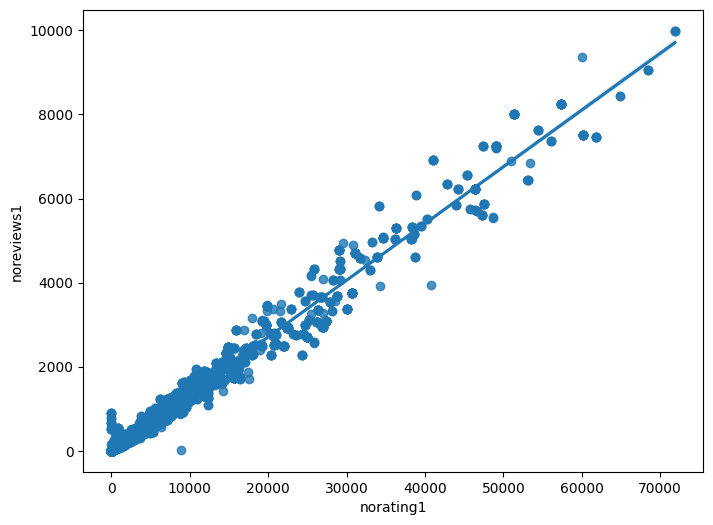

In [18]:
plt.figure(figsize = (8,6))
sns.regplot(x=df[df['noreviews1'] < 10000]['norating1'], y=df[df['noreviews1'] < 10000]['noreviews1'])

###### FROM THE ABOVE PLOT WE CAN SAY THAT DATA IS MORE LINEAR WHEN "NORATING" FEATURE VALUE IS LESS THAN 10000
###### SO WE TRAIN THE LINEAR REGRESSION MODEL WITH THE DATA WHERE NORATING FEATURE VALUE IS LESS THAN 10000

In [19]:
LR = LinearRegression()
X_LR = df[df['noreviews1'] < 10000]['norating1'].values.reshape(-1,1)
y_LR = df[df['noreviews1'] < 10000]['noreviews1'].values
LR.fit(X_LR, y_LR)

df.loc[df['noreviews1'].isnull(), 'noreviews1'] = LR.predict(df[df['noreviews1'].isnull()]['norating1'].values.reshape(-1,1))

In [20]:
df.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
kfold         0
dtype: int64

###### DELETE NON REQUIRED FEATURES

###### TITLE,PLATFORM

In [21]:
df.drop(['title','id','platform'],axis=1,inplace=True)

##### NOW MAKING CATEGORICAL DATA INTO NUMERICAL DATA....USING ONE HOT ENCODING

In [22]:
df["maincateg"] = df["maincateg"].replace({"Men": 1,"Women": 0,"Unisex":2})

df['maincateg'].unique()

array([0, 1, 2], dtype=int64)

### TRAIN AND VALIDATION DATASET

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [24]:
x_train = train_set.loc[:,train_set.columns != "price1"]
y_train = train_set["price1"]

In [25]:
x_train.head()

,Rating,maincateg,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,kfold
10498,3.7,1,499,80.16%,171.0,12.0,76.0,35.0,21.0,18,21,0,1
2715,4.0,1,999,52.85%,457.0,73.0,237.0,86.0,69.0,18,47,1,1
6624,3.8,1,999,70.07%,275.0,51.0,127.0,55.0,38.0,25,30,0,1
9723,3.7,1,510,11.57%,15280.0,2056.0,7208.0,2435.0,2149.0,1160,2328,1,1
1566,4.0,0,499,46.09%,405.0,87.0,204.0,86.0,60.0,22,33,0,1


In [26]:
x_train['Offer %'] = x_train['Offer %'].str.rstrip('%').astype(float) / 100

In [28]:
x_test = test_set.loc[:,test_set.columns != "price1"]
y_test_act = test_set["price1"]
y_test_act

11797     439
3184      723
5769     1086
9407      380
88        298
         ... 
7808     1470
4990      797
2067      474
14336     199
1508     3147
Name: price1, Length: 3146, dtype: int64

In [29]:
x_test['Offer %'] = x_test['Offer %'].str.rstrip('%').astype(float) / 100

In [30]:
## ARRAY FORM OF ACTUAL TEST LABELS

actual_ans = y_test_act.to_numpy()
actual_ans

array([ 439,  723, 1086, ...,  474,  199, 3147], dtype=int64)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
x_train.columns

Index(['Rating', 'maincateg', 'actprice1', 'Offer %', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1', 'kfold'],
      dtype='object')

In [33]:
X_train_scaled = scaler.fit_transform(x_train)

X_test_scaled = scaler.transform(x_test)

### LINEAR REGRESSION

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred_lr = lin_reg.predict(X_test_scaled)
y_pred_lr

array([ 393.40491561,  936.42358095, 1206.13318977, ...,  444.36898074,
         83.33085753, 2421.45928723])

In [36]:
from sklearn.metrics import mean_squared_error

import math

MSE_lr=mean_squared_error(actual_ans,y_pred_lr)
RMSE_lr = math.sqrt(MSE_lr)

RMSE_lr

199.40860705836062

### DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
X_test_scaled

array([[-1.03375719,  1.14468685, -0.29714161, ..., -0.24557252,
        -1.22284099, -2.23606798],
       [ 0.29523096,  1.14468685,  0.63639466, ..., -0.28224912,
         0.81776781, -2.23606798],
       [-1.36600423, -0.84877278,  1.1640456 , ..., -0.28539283,
         0.81776781, -2.23606798],
       ...,
       [-0.36926312,  1.14468685, -0.29714161, ...,  0.19873832,
         0.81776781, -2.23606798],
       [-0.03701608, -0.84877278, -0.45949575, ..., -0.26757848,
        -1.22284099, -2.23606798],
       [-0.03701608,  1.14468685,  2.54080866, ..., -0.28120122,
         0.81776781, -2.23606798]])

In [39]:
y_pred_DT = tree_reg.predict(X_test_scaled)
y_pred_DT

array([ 439.,  901., 1040., ...,  474.,  199., 3147.])

In [40]:
MSE_DT=mean_squared_error(actual_ans,y_pred_DT)
RMSE_DT = math.sqrt(MSE_DT)

RMSE_DT

60.63222745142678

### RANDOM FOREST

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#### GRIDSEARCH CV FOR RANDOM FOREST

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [20,50,100],
     'max_features': [2, 3,5,10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False],
     'n_estimators': [3, 10],
     'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search1 = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 5, 10],
                          'n_estimators': [20, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
#BEST PARAMETERS AFTER GRIDSEARCH CV

grid_search1.best_params_

{'max_features': 10, 'n_estimators': 100}

In [44]:
#RANDOM FOREST WITH GRIDSEARCH CV PARAMETERS

forest_reg_GDCV = RandomForestRegressor(n_estimators= 30,
                                 max_features= 6,
                                 bootstrap= True)
forest_reg_GDCV.fit( X_train_scaled, y_train)

RandomForestRegressor(max_features=6, n_estimators=30)

In [45]:
y_pred_RF_GDCV = forest_reg_GDCV.predict(X_test_scaled)
y_pred_RF_GDCV

array([ 440.56666667,  868.83333333, 1190.76666667, ...,  474.        ,
        197.56666667, 3076.8       ])

In [46]:
MSE_RF_GDCV = mean_squared_error(actual_ans,y_pred_RF_GDCV)
RMSE_RF_GDCV = math.sqrt(MSE_RF_GDCV)

RMSE_RF_GDCV

81.25122477763689

### XGBOOST REGRESSOR

In [47]:
# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [20,50,100,200],
    'max_depth':[2, 3, 5, 10],
    'learning_rate':[0.1,0.2,0.3],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    }

xgb_reg = XGBRegressor()

grid_search2 = GridSearchCV(xgb_reg, param_grid,
            cv=5,scoring = 'neg_mean_squared_error',n_jobs = -1,
            return_train_score = True)
grid_search2.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 5, 10],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [20, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
  #BEST PARAMETERS AFTER GRIDSEARCH CV

grid_search2.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200}

In [49]:
#XG BOOST WITH GRIDSEARCH CV PARAMETER

XG_GDCV = XGBRegressor(n_estimators= 200,
                       learning_rate= 0.1,max_depth=10,
                       min_child_weight=3,booster='gbtree')

XG_GDCV.fit( X_train_scaled, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
y_pred_XG_GDCV = XG_GDCV.predict(X_test_scaled)
y_pred_XG_GDCV

array([ 435.7481 ,  875.23694, 1117.4226 , ...,  474.27213,  200.45532,
       3141.2344 ], dtype=float32)

In [51]:
MSE_XG_GDCV = mean_squared_error(actual_ans,y_pred_RF_GDCV)
RMSE_XG_GDCV = math.sqrt(MSE_XG_GDCV)

RMSE_XG_GDCV

81.25122477763689

### PREDICTION ON TEST DATA

In [53]:
df_test = pd.read_csv('./train_folds.csv')
df_test = df_test.loc[:,df_test.columns != "price1"]
df_test['Offer %'] = df_test['Offer %'].str.rstrip('%').astype(float) / 100
df_test.head()


,id,title,Rating,maincateg,platform,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,kfold
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,999,0.3013,38.0,7.0,17.0,9.0,6.0,3,3,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,1999,0.5003,531.0,69.0,264.0,92.0,73.0,29,73,1,4
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,4999,0.4501,17.0,4.0,11.0,3.0,2.0,1,0,1,3
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,724,0.1585,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,2299,0.4002,77.0,3.0,35.0,21.0,7.0,7,7,1,4


In [54]:
df_test.loc[df_test['star_5f'].isnull(), 'star_5f'] = XGB_S5.predict(np.array(df_test.loc[df_test['star_5f'].isnull(), ['Rating', 'star_2f', 'star_1f']]))

In [55]:
#filling null value sin "maincategory" feature

df_test.loc[df_test['title'].str.upper().str.contains('WOMEN') & df_test['maincateg'].isnull(), 'maincateg'] = 'Women'
df_test.loc[df_test['title'].str.upper().str.contains('MEN') & df_test['maincateg'].isnull(), 'maincateg'] = 'Men'
df_test['maincateg'].isnull().sum()

57

In [56]:
df_test.loc[df_test['maincateg'].isnull(), 'maincateg'] = 'Unisex'
print(df_test['maincateg'].isnull().sum())



0


In [57]:
df_test.shape

(15730, 16)

In [58]:
# FEATURE: 'rating'

df_test['Rating'].fillna(value=df_test['Rating'].mean(), inplace=True)

In [59]:
df_test.head()

,id,title,Rating,maincateg,platform,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,kfold
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,999,0.3013,38.0,7.0,17.0,9.0,6.0,3,3,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,1999,0.5003,531.0,69.0,264.0,92.0,73.0,29,73,1,4
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,4999,0.4501,17.0,4.0,11.0,3.0,2.0,1,0,1,3
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,724,0.1585,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,2299,0.4002,77.0,3.0,35.0,21.0,7.0,7,7,1,4


In [60]:
df_test.isnull().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f         0
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
kfold           0
dtype: int64

In [61]:
df_test.head()

,id,title,Rating,maincateg,platform,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,kfold
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,999,0.3013,38.0,7.0,17.0,9.0,6.0,3,3,0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,1999,0.5003,531.0,69.0,264.0,92.0,73.0,29,73,1,4
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,4999,0.4501,17.0,4.0,11.0,3.0,2.0,1,0,1,3
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,724,0.1585,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,2299,0.4002,77.0,3.0,35.0,21.0,7.0,7,7,1,4


In [62]:
temp_s3f = df_test.loc[df_test['star_3f'].notnull(), ['star_3f']]
mean_s3f = temp_s3f.mean()
temp = mean_s3f["star_3f"]

In [63]:
temp_s4f = df_test.loc[df_test['star_4f'].notnull(), ['star_4f']]
mean_s4f = temp_s4f.mean()
temp1 = mean_s4f["star_4f"]

In [64]:
temp_norating = df_test.loc[df_test['norating1'].notnull(), ['norating1']]
mean_norating=temp_norating.mean()
val_norating = mean_norating["norating1"]
# mean_norating
temp_noreviews1 = df_test.loc[df_test['noreviews1'].notnull(), ['noreviews1']]
mean_noreviews=temp_noreviews1.mean()
val_noreviews = mean_noreviews["noreviews1"]

In [65]:
df_test["star_3f"] = df_test["star_3f"].fillna(temp)
df_test["star_4f"] = df_test["star_4f"].fillna(temp1)
df_test["norating1"] = df_test["norating1"].fillna(val_norating)
df_test["noreviews1"] = df_test["noreviews1"].fillna(val_noreviews)

In [66]:
df_test["star_3f"].dtype

dtype('float64')

In [ ]:
#for filling the star_1f null values
# XGB_S1 = XGBRegressor()
# X_S1 = np.array(df.loc[df['star_1f'].notna(), ['Rating','star_4f', 'star_2f']])
# y_S1 = np.array(df[df['star_1f'].notna()]['star_4f'])
# XGB_S1.fit(X_S1, y_S1)

# df_test.loc[df_test['star_1f'].isnull(), 'star_1f'] =XGB_S1.predict(np.array(df_test.loc[df_test['star_1f'].isnull(), ['Rating','star_4f', 'star_2f']]))
# alpha = XGB_S1.predict(np.array(df_test.loc[df_test['star_1f'].isnull(), ['Rating','star_4f', 'star_2f']]))

In [67]:
df_test.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
kfold         0
dtype: int64

In [68]:
#by now all teh features are without null values

df_test["maincateg"] = df_test["maincateg"].replace({"Men": 1,"Women": 0,"Unisex":2})

df_test.drop(['title','platform'],axis=1,inplace=True)


In [69]:
#DROPPING ID FEATURE

df_test.drop(['id'],axis=1,inplace=True)

In [70]:
#SCALING THE DATA

df_test_scaled = scaler.transform(df_test)

In [71]:
df_test_scaled

array([[-0.36926312, -0.84877278, -0.29714161, ..., -0.28434493,
        -1.22284099, -2.23606798],
       [-0.70151015,  1.14468685,  0.51462906, ..., -0.21099172,
         0.81776781,  1.34164079],
       [ 1.29197207, -0.84877278,  2.94994108, ..., -0.28748864,
         0.81776781,  0.4472136 ],
       ...,
       [-1.03375719, -0.84877278, -0.70302695, ..., -0.27177009,
         0.81776781,  1.34164079],
       [-0.36926312,  1.14468685,  2.54405575, ..., -0.2382372 ,
         0.81776781, -2.23606798],
       [ 3.2854543 ,  1.14468685,  1.1640456 , ..., -0.28748864,
         0.81776781, -0.4472136 ]])

### RANDOM FOREST REGRESSOR

In [72]:
y_subm_RF_GDCV = forest_reg_GDCV.predict(df_test_scaled)
y_subm_RF_GDCV

array([ 687.66666667,  998.93333333, 2740.36666667, ...,  350.06666667,
       2259.83333333, 1586.        ])

In [74]:
sub_2 = pd.read_csv('./train_folds.csv')

sub_2['price1'] = y_subm_RF_GDCV

In [75]:
sub_2 = pd.read_csv('./train_folds.csv')

sub_2.drop(['title','Rating', 'maincateg', 'platform', 'actprice1', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1'],axis=1,inplace = True,index=None)

In [76]:
sub_2['price1'] = y_subm_RF_GDCV


### XGB REGRESSOR

In [77]:
y_subm_XG_GDCV = XG_GDCV.predict(df_test_scaled)
y_subm_XG_GDCV

array([ 698.7953 ,  998.7544 , 2755.497  , ...,  355.93167, 2254.5796 ,
       1538.799  ], dtype=float32)

In [ ]:
sub_3 = pd.read_csv('test.csv')
sub_3['price1'] = y_subm_XG_GDCV

In [ ]:
sub_3 = pd.read_csv('test.csv')

sub_3.drop(['title','Rating', 'maincateg', 'platform', 'actprice1', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1'],axis=1,inplace = True,index=None)

In [ ]:
sub_3['price1'] = y_subm_XG_GDCV
